
####################################20-02-2024######################################

In this notebook I have seen how to grab some raw data and create some interesting charts using Pandas and Matplotlib. I have:

* used .groupby() to explore the number of posts and entries per programming language 
* converted strings to Datetime objects with to_datetime() for easier plotting 
* reshaped the DataFrame by converting categories to columns using .pivot() 
* used .count() and isna().values.any() to look for NaN values in the DataFrame, which I then replaced using .fillna() 
* created (multiple) line charts using .plot() with a for-loop 
* styled the charts by changing the size, the labels, and the upper and lower bounds of the axis. 
* added a legend to tell apart which line is which by colour 
* smoothed out the time-series observations with .rolling().mean() and plotted them to better identify trends over time. 

Each post on StackOverflow has a tag indicating the programming language in question. Through this page tackexchange ( https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com ), you can launch a query and download a CSV file of the posts published on StackOverflow.

##### ITA

Ogni post in stackoverflow presenta un tag che indica il linguaggio di programmazione in questione, 
tramite questa a pagina tackexchange ( https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com ) si può lanciare una query e scarica un file csv dei post pubblicati su StackOverflow.




With this notebook, I will cover the following points:

Data visualization using the Matplotlib library

Pivot, grouping, and data manipulation with the Pandas library in the desired format

Working with timestamp and time-series data

Working with and customizing plot lines.

#### ITA
con questo notebook toccherò i seguenti punti:

- visualizzazione di dati con libreria Matplotlib
- pivot, ragruppamento e manipolazione dati con la libreria Pandas nel formato desiderato
- lavorare con dati di tipo timestamps and time-series 
- lavorare e personalizzare linee di grafico


The CSV file that I downloaded and worked on has 2580 rows and 3 columns. I renamed the columns in order to give them meaning and work more easily.

In [9]:
# apertua file csv
import pandas as pd

df = pd.read_csv("./data.csv")

print(f"SHAPE: {df.shape}")

SHAPE: (2580, 3)


In [10]:
df.count()

m             2580
TagName       2580
Unnamed: 2    2580
dtype: int64

In [11]:
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,504
4,2008-08-01 00:00:00,c++,164


In [12]:


df.rename(columns={"m":"DATE","TagName":"TAG","Unnamed: 2":"POSTS"}, inplace=True)

df.head(2)

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8


In [13]:
df.tail(2)

,DATE,TAG,POSTS
2578,2024-01-01 00:00:00,ruby,166
2579,2024-01-01 00:00:00,swift,924




Using the groupby() function, I sum up the posts with the same tag and save the resulting list in a variable. Later, I sort this variable and set the 'ascending' parameter to 'False' (since by default it's set to 'True'). This allows me to have the sum values in descending order, so the programming language with the highest number of posts will be at the top of the list, followed by those with fewer posts until the language with the lowest number of posts.

In [14]:
tag_post_sum = df.groupby(["TAG"])["POSTS"].sum()
tag_post_sum.sort_values(ascending=False)

# 

TAG
javascript    2521080
python        2178757
java          1912465
c#            1610248
php           1462525
c++            803902
r              502501
c              402447
swift          332222
ruby           228812
go              72169
perl            68026
delphi          51650
assembly        43939
Name: POSTS, dtype: int64

Using the groupby function, I perform the counting of the number of times a tag appears. Knowing that a tag appears once a month, this allows me to obtain the number of months in which the tag of a particular programming language has appeared... finally sorted in descending order.

In [15]:
tag_post_count = df.groupby(["TAG"])["POSTS"].count()
tag_post_count.sort_values(ascending=False)

TAG
c#            187
assembly      186
c             186
c++           186
delphi        186
java          186
javascript    186
perl          186
php           186
python        186
ruby          186
r             184
swift         178
go            171
Name: POSTS, dtype: int64

The elements in the data column are in 'string' format to facilitate their manipulation and work more easily, I need to convert the data into a datetime object.

In [16]:

print(f'{df["DATE"][0]}\nDATE ELEMENT TYPE:{type(df["DATE"][0])}')


2008-07-01 00:00:00
DATE ELEMENT TYPE:<class 'str'>


In [17]:
df["DATE"] = pd.to_datetime(df["DATE"])

In [18]:
print(f'{df["DATE"][0]}\nDATE ELEMENT TYPE:{type(df["DATE"][0])}')

2008-07-01 00:00:00
DATE ELEMENT TYPE:<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [19]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,504
4,2008-08-01,c++,164


# Data Manipulation: Pivoting DataFrames

Convert the DataFrame into a named table reshaped_df, where the "DATE" column of the DataFrame is used as the index, the tags from the "TAG" column are used as columns, and the values from the "POSTS" column are used as values in the table

In [20]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,608.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,499.0,448.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,157.0,871.0,3047.0,1491.0,105.0,424.0,3327.0,5698.0,61.0,1663.0,8616.0,2038.0,191.0,861.0
2023-10-01,175.0,975.0,3196.0,1720.0,165.0,421.0,3442.0,5495.0,53.0,1547.0,9042.0,2066.0,196.0,905.0
2023-11-01,172.0,958.0,3116.0,1470.0,103.0,411.0,3292.0,5208.0,44.0,1404.0,8491.0,1999.0,157.0,872.0


I examine the size of the reshaped dataframe to determine the number of rows and columns it contains.
I print the column names.
I examine the number of cells per column.
I examine the head and tail of the reshaped dataframe to see how it is structured.

In [21]:
reshaped_df.shape

(187, 14)

In [22]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [23]:
reshaped_df.count()

TAG
assembly      186
c             186
c#            187
c++           186
delphi        186
go            171
java          186
javascript    186
perl          186
php           186
python        186
r             184
ruby          186
swift         178
dtype: int64

In [24]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,608.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,499.0,448.0,1.0,157.0,NaN


In [25]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2023-09-01,157.0,871.0,3047.0,1491.0,105.0,424.0,3327.0,5698.0,61.0,1663.0,8616.0,2038.0,191.0,861.0
2023-10-01,175.0,975.0,3196.0,1720.0,165.0,421.0,3442.0,5495.0,53.0,1547.0,9042.0,2066.0,196.0,905.0
2023-11-01,172.0,958.0,3116.0,1470.0,103.0,411.0,3292.0,5208.0,44.0,1404.0,8491.0,1999.0,157.0,872.0
2023-12-01,182.0,878.0,2654.0,1442.0,75.0,327.0,2553.0,4796.0,53.0,1206.0,7035.0,1609.0,154.0,749.0
2024-01-01,179.0,863.0,2853.0,1715.0,90.0,364.0,3109.0,5389.0,37.0,1525.0,8250.0,1855.0,166.0,924.0


# Handling the presence of 'NaN' values.

In [26]:
reshaped_df.isna()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,True,True,False,True,True,True,True,True,True,True,True,True,True,True
2008-08-01,False,False,False,False,False,True,False,False,False,False,False,True,False,True
2008-09-01,False,False,False,False,False,True,False,False,False,False,False,False,False,True
2008-10-01,False,False,False,False,False,True,False,False,False,False,False,True,False,True
2008-11-01,False,False,False,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2023-10-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2023-11-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Using '.fillna(0, inplace=True)', I replace the 'NaN' values present in some cells with '0' and save the operation by setting the parameter 'inplace=True'.

In [27]:
reshaped_df.fillna(0, inplace=True)

In [28]:
reshaped_df.isna().values.any()

False

In [29]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,504.0,164.0,14.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,807.0,112.0,0.0,1149.0,722.0,128.0,608.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,580.0,97.0,499.0,448.0,1.0,157.0,0.0


# data visualization

Data visualization with Matplotlib as plt.

In [1]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

Once the graph settings are configured, I set the date on the x-axis and the number of posts on the y-axis.
plt.ylim(0, 35000) indicates that the data ranges from a value greater than or equal to 0 to 35000.

In [33]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("number of post", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylim(0,35000)
plt.plot(reshaped_df.index, reshaped_df["java"])
plt.plot(reshaped_df.index, reshaped_df["python"])

NameError: name 'plt' is not defined

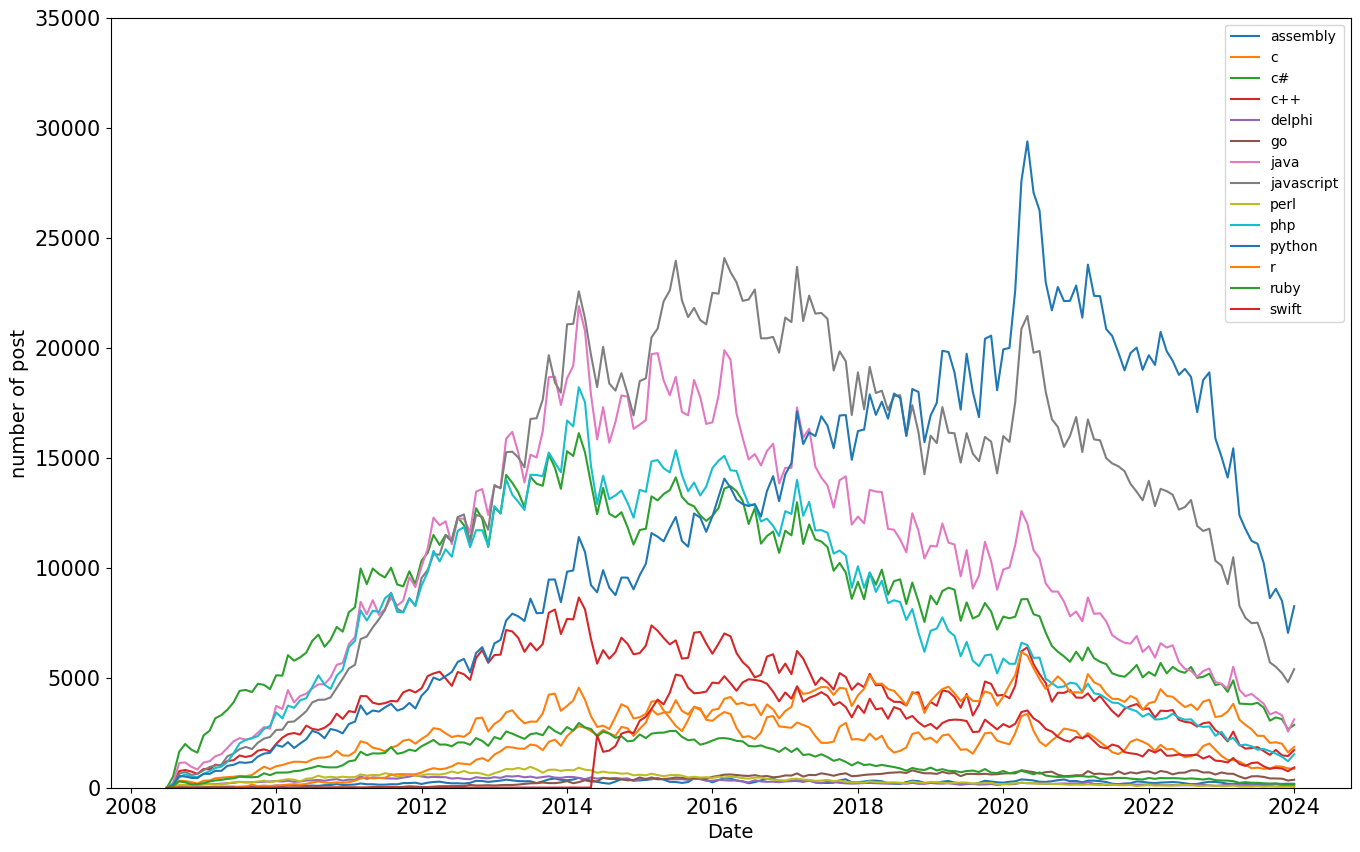

In [43]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("number of post", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylim(0,35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label=reshaped_df[column].name)
plt.legend()

# Smoothing out Time-Series Data

Looking at the graph, it's noticeable that the time series data is heavily contaminated by impurities, resulting in many high and low peaks. This makes it more difficult to follow the trends. Therefore, I use the rolling().mean() technique to smooth out the observations by taking an average, thus obtaining a moving average.

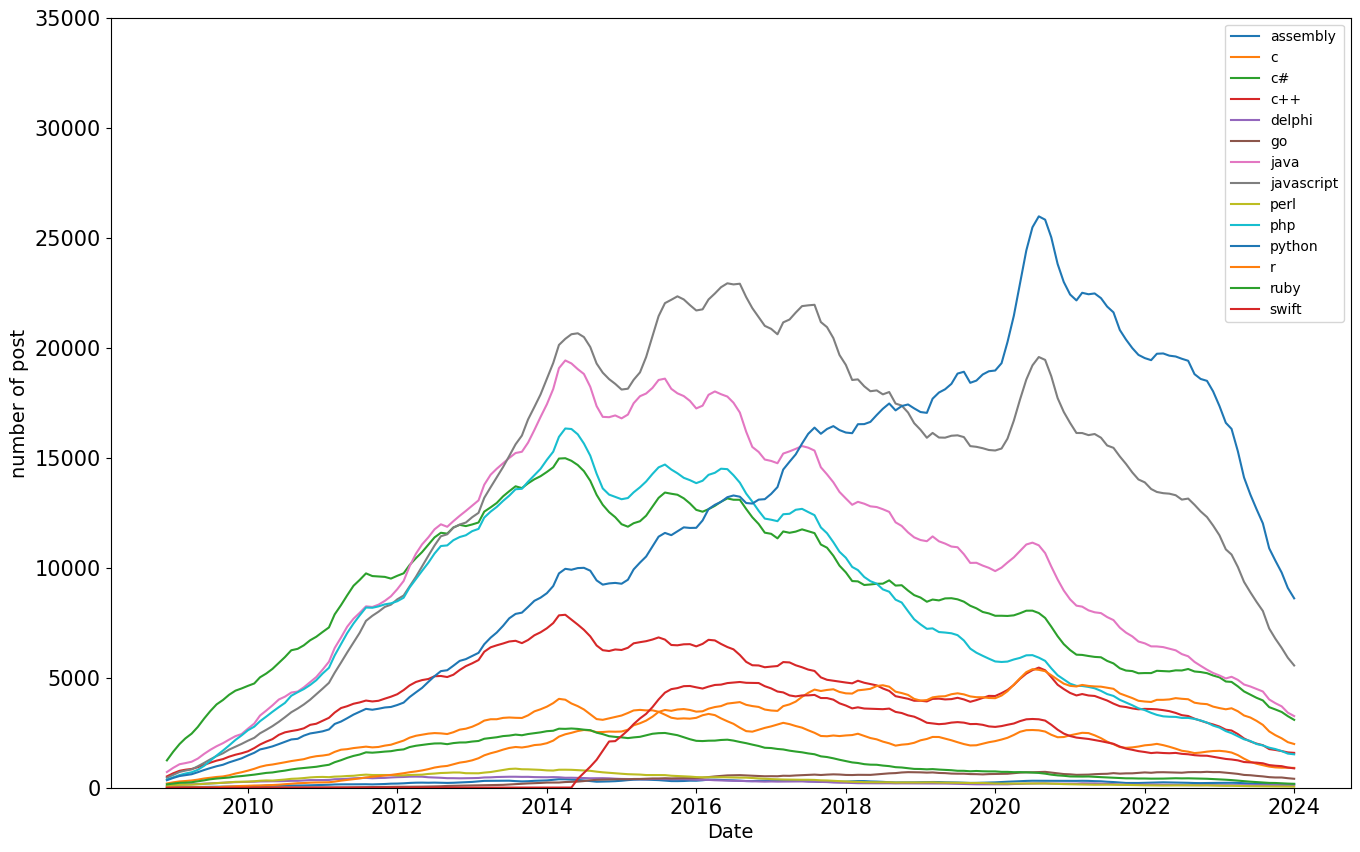

In [45]:
reshaped_df_roll = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("number of post", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylim(0,35000)
for column in reshaped_df_roll.columns:
    plt.plot(reshaped_df_roll.index, reshaped_df_roll[column], label=reshaped_df_roll[column].name)
plt.legend()

#

Now that the data has been extracted, cleaned, and visualization settings have been defined, it's easier to manipulate them to search for information and answers to questions.

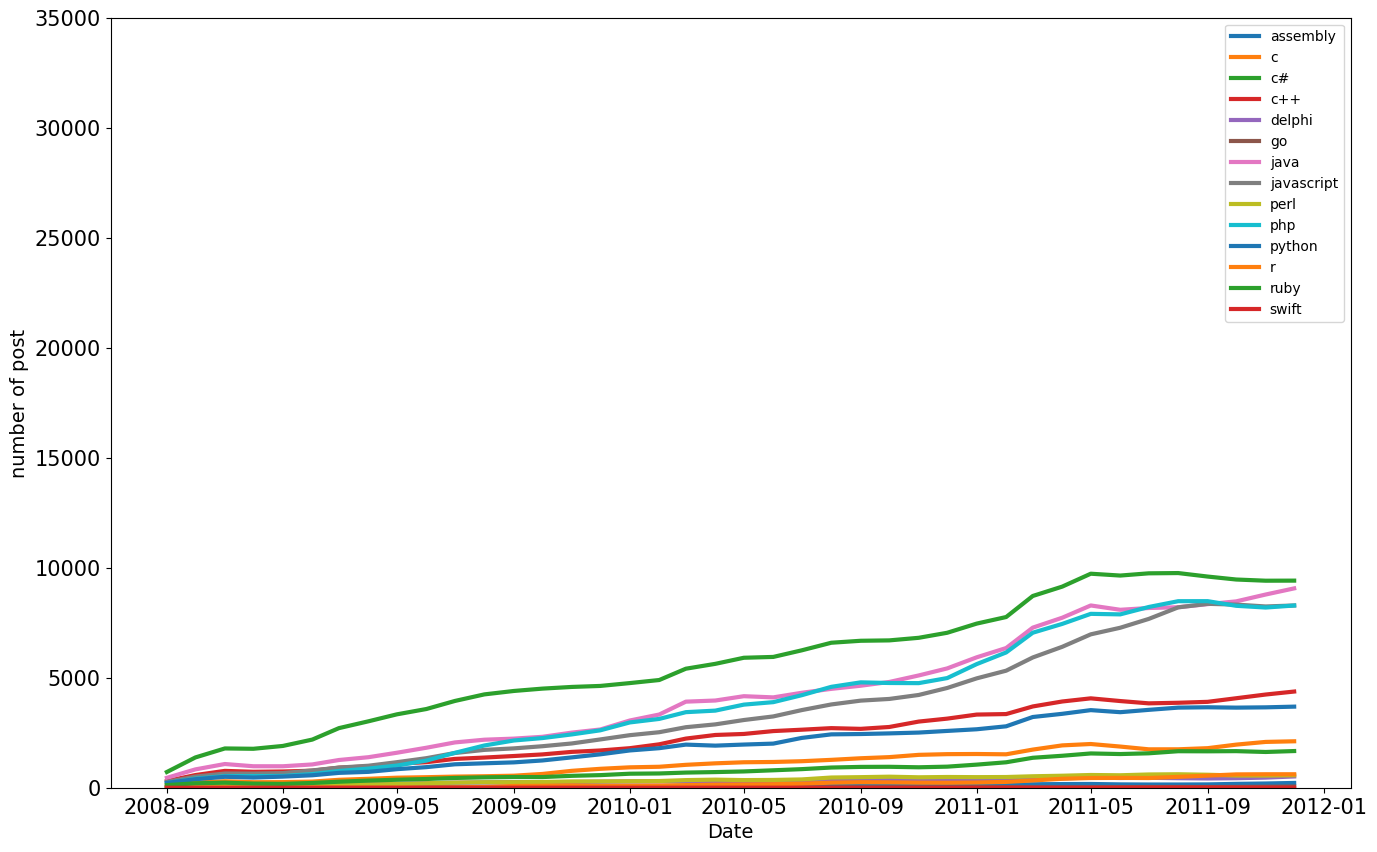

In [67]:
df_x = df
df_x_8_12 = df[df["DATE"].dt.year < 2012]
reshapedf_x_8_12 = df_x_8_12.pivot(index="DATE",  columns="TAG", values="POSTS")
reshapedf_x_8_12.fillna(0, inplace=True)
reshapedf_x_8_12 = reshapedf_x_8_12.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("number of post", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylim(0,35000)
for column in reshapedf_x_8_12.columns:
    plt.plot(reshapedf_x_8_12.index, reshapedf_x_8_12[column],linewidth=3, label=reshapedf_x_8_12[column].name)
plt.legend()

Based on the graph, the most popular programming language for posting between 2008 and 2012 appears to be C#.

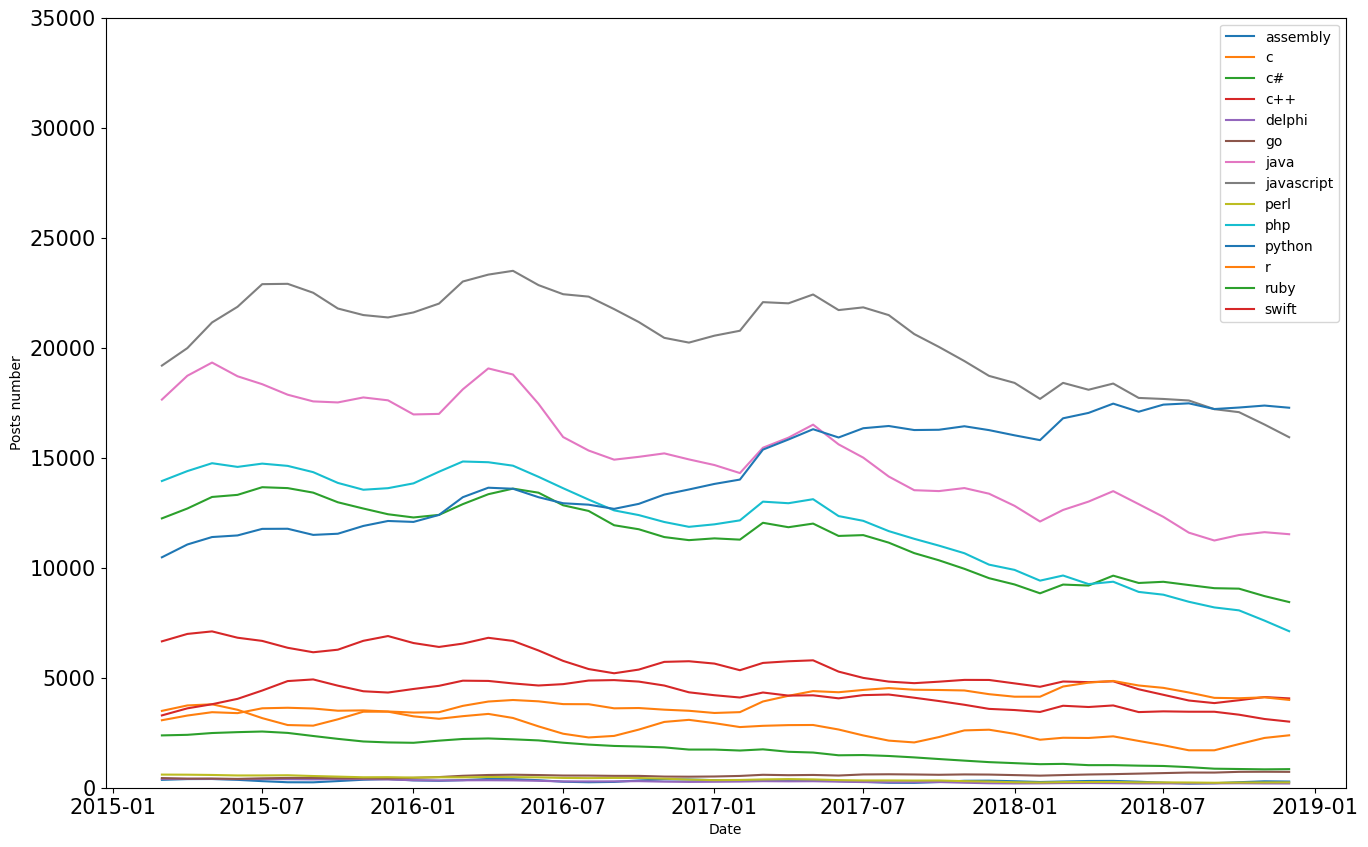

In [84]:
df_x_15_18 = df[((df["DATE"].dt.year >= 2015) & (df["DATE"].dt.year <= 2018))]
reshaped_df_x_15_18 = df_x_15_18.pivot(index="DATE", columns="TAG", values="POSTS")
reshaped_df_x_15_18.fillna(0, inplace=True)
roling_reshaped_df_x_15_18 = reshaped_df_x_15_18.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xlabel("Date", fontsize=10)
plt.ylabel("Posts number", fontsize=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 35000)

for column in roling_reshaped_df_x_15_18.columns:
    plt.plot(roling_reshaped_df_x_15_18.index, roling_reshaped_df_x_15_18[column], label=roling_reshaped_df_x_15_18[column].name)
plt.legend()

From the trend of the graph, it is evident that the most popular language on StackOverflow from 2015 to 2018 (based on the number of posts made) appears to be JavaScript.

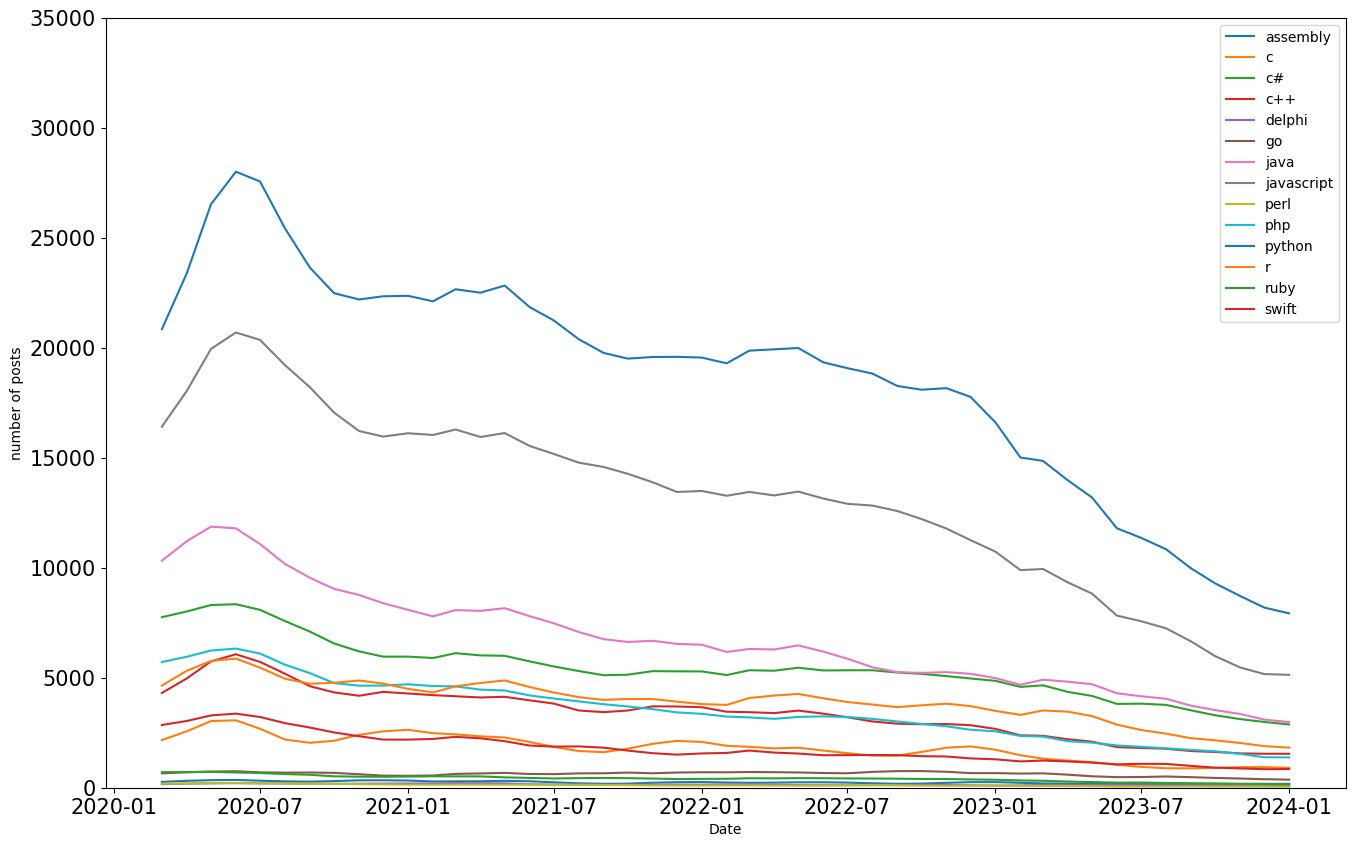

In [102]:
twok2_1_3 = df[df["DATE"].dt.year >= 2020]
reshaped_twok2_1_3 = twok2_1_3.pivot(index="DATE", columns="TAG", values="POSTS")
rolling_reshaped_twok2_1_3 = reshaped_twok2_1_3.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xlabel("Date", fontsize=10)
plt.ylabel("number of posts", fontsize=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim((0,35000))

for column in rolling_reshaped_twok2_1_3.columns:
    plt.plot(rolling_reshaped_twok2_1_3.index, rolling_reshaped_twok2_1_3[column], label=rolling_reshaped_twok2_1_3[column].name)
plt.legend()


My comment is limited solely to what I could observe based on these data, which are based on the number of posts published on StackOverflow and grouped according to their respective tags (referring to programming languages) from 2008 until February 2024.

In [106]:
reshaped_twok2_1_3.head(10)


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-01-01,229,2049,7781,4219,163,647,9918,15985,165,5870,19924,4142,761,2892
2020-02-01,271,1976,7699,4070,156,661,10013,15718,178,5633,19990,4669,653,2756
2020-03-01,293,2475,7775,4634,167,652,11031,17536,196,5635,22609,5117,711,2906
2020-04-01,378,3248,8563,6200,231,795,12575,20857,220,6590,27573,6166,766,3440
2020-05-01,358,3362,8576,6386,201,751,11995,21446,214,6482,29378,6006,695,3512
2020-06-01,329,2583,7885,5612,202,706,10800,19771,198,5901,27050,5432,613,3152
2020-07-01,271,2094,7794,5160,193,642,10423,19851,176,5914,26241,4935,697,2981
2020-08-01,265,1890,7047,4770,182,707,9287,18003,192,4957,22978,4494,553,2673
2020-09-01,294,2146,6444,3911,172,728,8917,16753,166,4753,21699,4751,513,2550


In [107]:
reshaped_twok2_1_3.tail(10)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2023-04-01,194,1185,3824,1955,121,509,4452,8265,56,1919,12385,3091,219,1081
2023-05-01,174,1045,3810,1775,114,418,4161,7723,54,1961,11765,2858,254,989
2023-06-01,155,884,3792,1805,117,517,4267,7481,54,1888,11220,2655,225,1123
2023-07-01,160,913,3862,1844,99,522,4046,7502,68,1727,11090,2359,224,1148
2023-08-01,143,859,3641,1666,106,492,3816,6753,49,1762,10212,2358,201,971
2023-09-01,157,871,3047,1491,105,424,3327,5698,61,1663,8616,2038,191,861
2023-10-01,175,975,3196,1720,165,421,3442,5495,53,1547,9042,2066,196,905
2023-11-01,172,958,3116,1470,103,411,3292,5208,44,1404,8491,1999,157,872
2023-12-01,182,878,2654,1442,75,327,2553,4796,53,1206,7035,1609,154,749
